In [7]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np


In [8]:
runsfile = '/home/ahenschel/YemenGenomeAnalysis_Unused/WGS/RoH/runs_all.csv'
df = dd.read_csv(runsfile, dtype={'lengthBps': np.float64})

In [26]:
runsPedfile = '/home/ahenschel/YemenGenomeAnalysis_Unused/WGS/RoH/runsPed.csv'
ped = dd.read_csv(runsPedfile, dtype={'lengthBps': np.float64})

In [28]:
ped.tail()

,Unnamed: 0,group,id,chrom,nSNP,from,to,lengthBps
556578,12701436,urn:wtsi:402772_H12_yemcha6103379,urn:wtsi:402772_H12_yemcha6103379,25,64,91941176,92168584,227408.0
556579,12701437,urn:wtsi:402772_H12_yemcha6103379,urn:wtsi:402772_H12_yemcha6103379,25,40,92190625,92349741,159116.0
556580,12701438,urn:wtsi:402772_H12_yemcha6103379,urn:wtsi:402772_H12_yemcha6103379,25,32,154934986,155013607,78621.0
556581,12701439,urn:wtsi:402772_H12_yemcha6103379,urn:wtsi:402772_H12_yemcha6103379,25,41,155075052,155195900,120848.0
556582,12701440,urn:wtsi:402772_H12_yemcha6103379,urn:wtsi:402772_H12_yemcha6103379,26,156,72,16482,16410.0


In [16]:
df.lengthBps.min().compute()

100001.0

In [17]:
lbps = df.groupby('id').lengthBps.sum().compute()

<AxesSubplot:xlabel='id'>

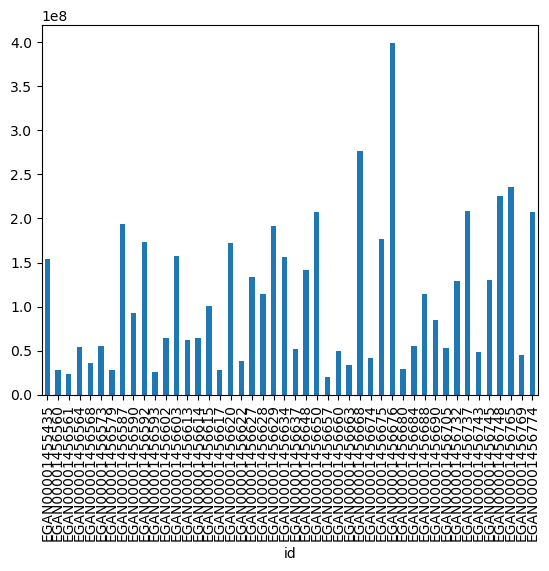

In [19]:
lbps.plot(kind='bar')

In [20]:
!pwd

/home/ahenschel/Dropbox/Yemen/YemenGenomeAnalysis/Notebooks


In [29]:
meta = pd.read_excel('~/Dropbox/Yemen/YemenGenomeAnalysis/Metadata/yemenWGS2GT_sampleIDs.xlsx')
rmeta = meta[meta.sample_acc.isin(set(lbps.index))]
rmeta.sample_name.sort_values()

0     3577STDY6068361
1     3577STDY6068362
2     3577STDY6068365
3     3577STDY6068369
4     3577STDY6068373
5     3577STDY6068374
7     3577STDY6068385
8     3577STDY6068391
9     3577STDY6068397
10    3577STDY6068398
11    3577STDY6068399
12    3577STDY6068404
13    3577STDY6068405
14    3577STDY6068409
15    3577STDY6068420
16    3577STDY6068422
17    3577STDY6068429
18    3577STDY6068430
19    3577STDY6068437
20    3577STDY6068446
21    3577STDY6068461
22    3577STDY6068465
23    3577STDY6068467
24    3577STDY6068469
25    3577STDY6068474
26    3577STDY6068481
27    3577STDY6068484
28    3577STDY6068485
29    3577STDY6068489
30    3577STDY6068492
31    3577STDY6068500
32    3577STDY6068501
33    3577STDY6068508
34    3577STDY6068511
35    3577STDY6068515
36    3577STDY6068517
37    3577STDY6068519
38    3577STDY6068523
39    3577STDY6068555
40    3577STDY6068563
41    3577STDY6068572
42    3577STDY6068577
43    3577STDY6068580
44    3577STDY6068609
45    3577STDY6068616
46    3577

In [102]:
sampleIds = {sampleId:i+1 for i, sampleId in enumerate(df.id.unique())}
df['y'] = [sampleIds[sid] for sid in df.id]


/tmp/ipykernel_207148/1701406443.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,10))


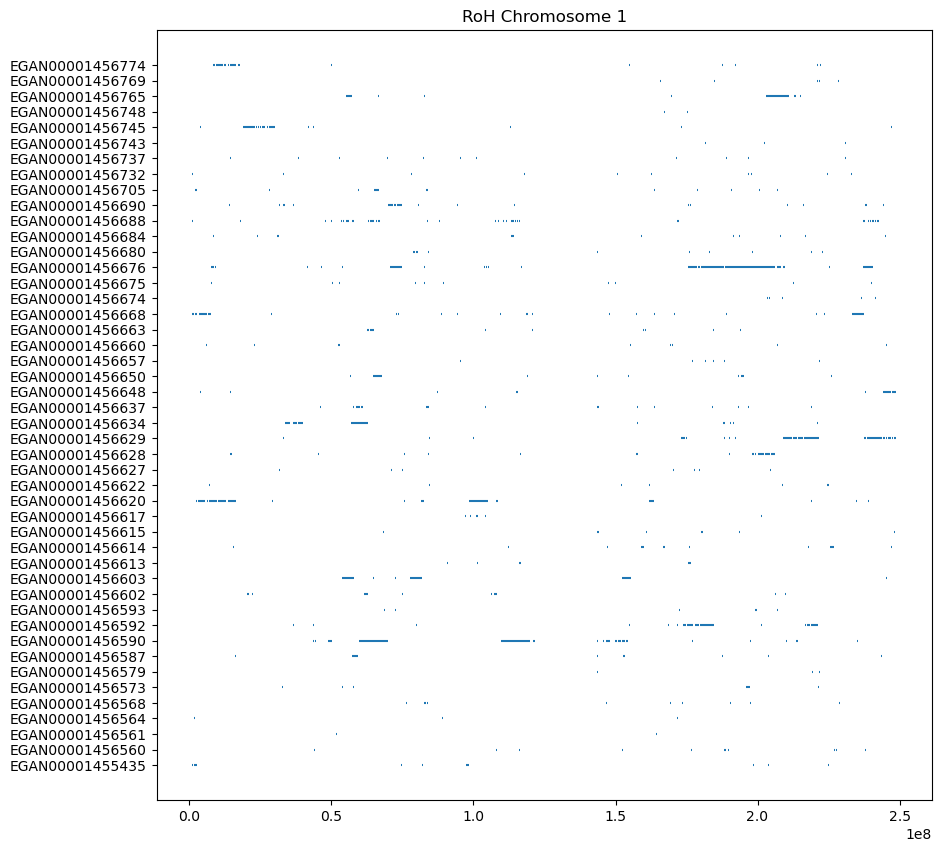

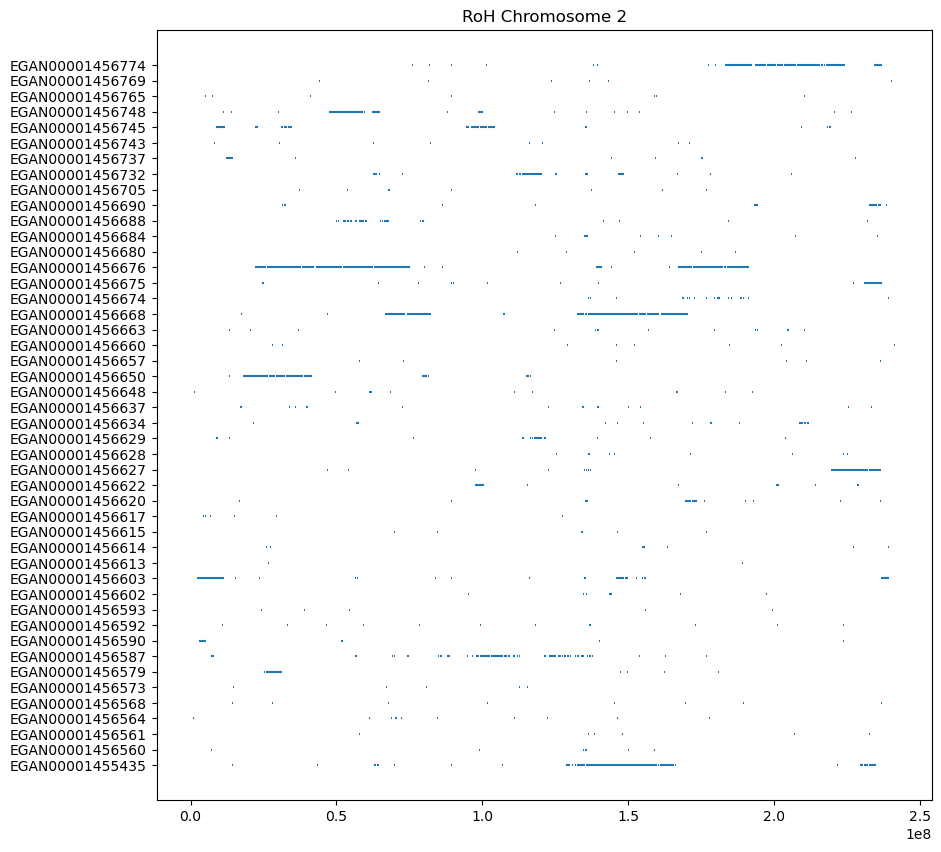

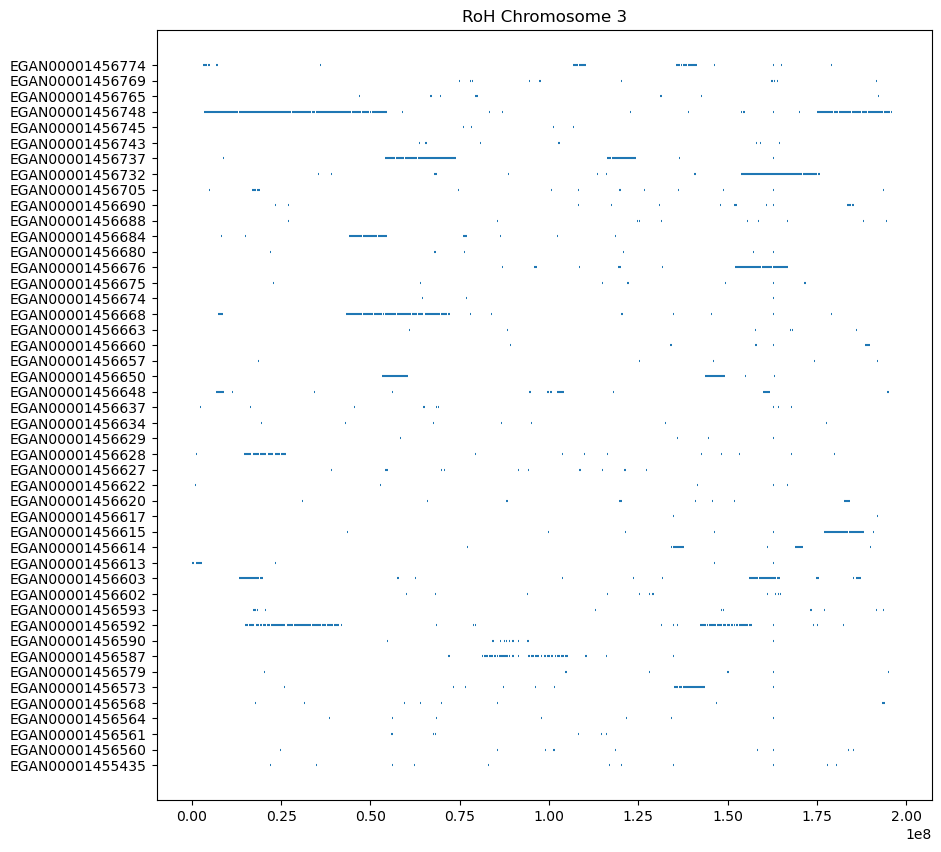

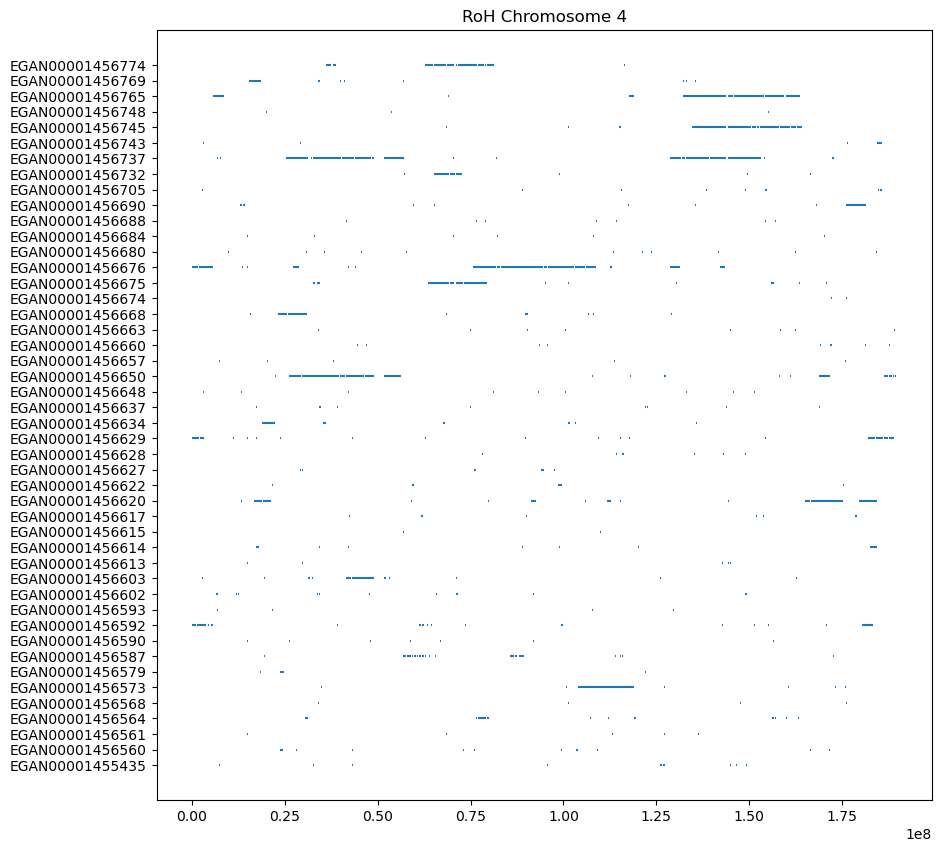

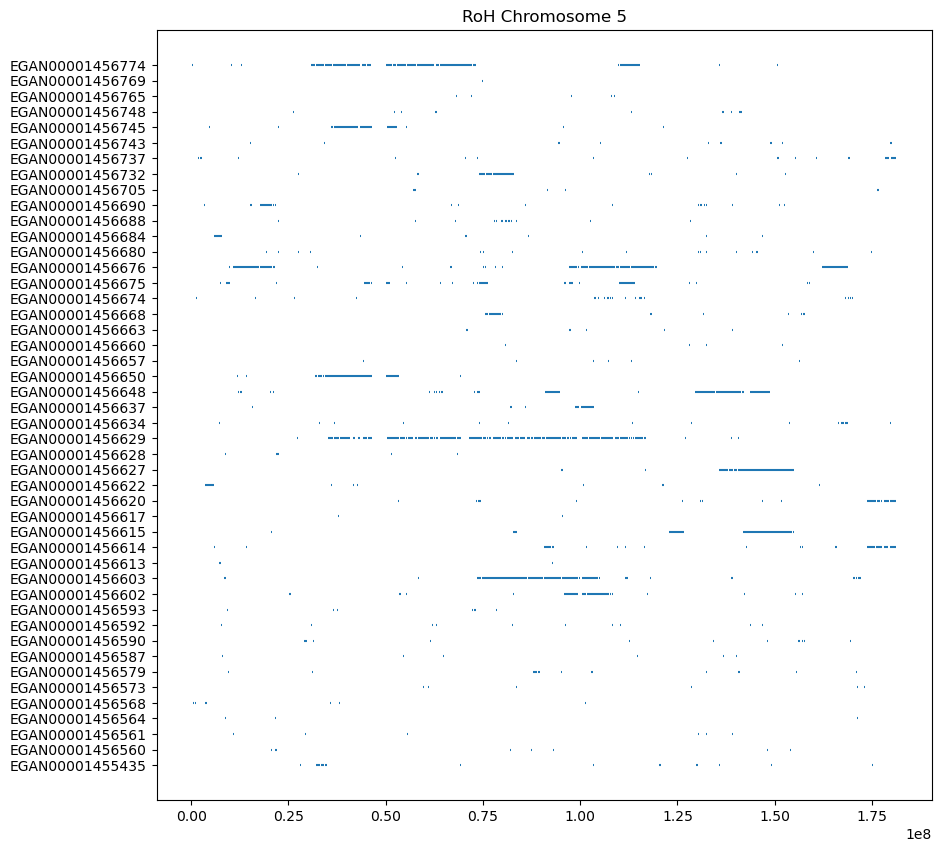

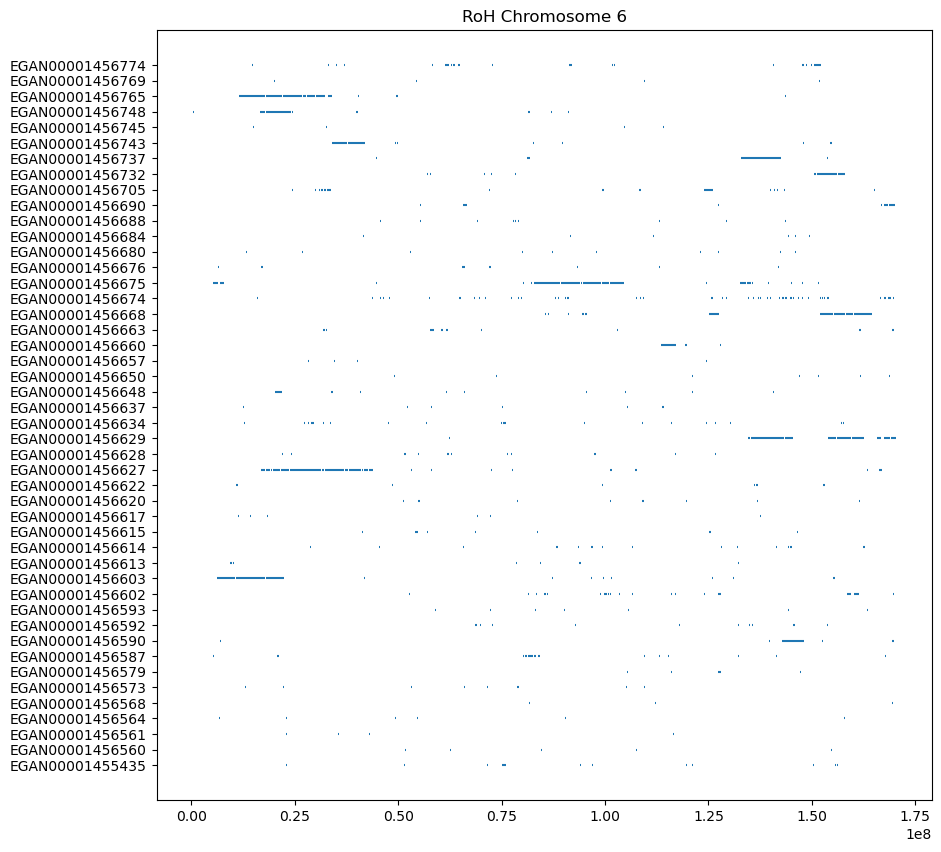

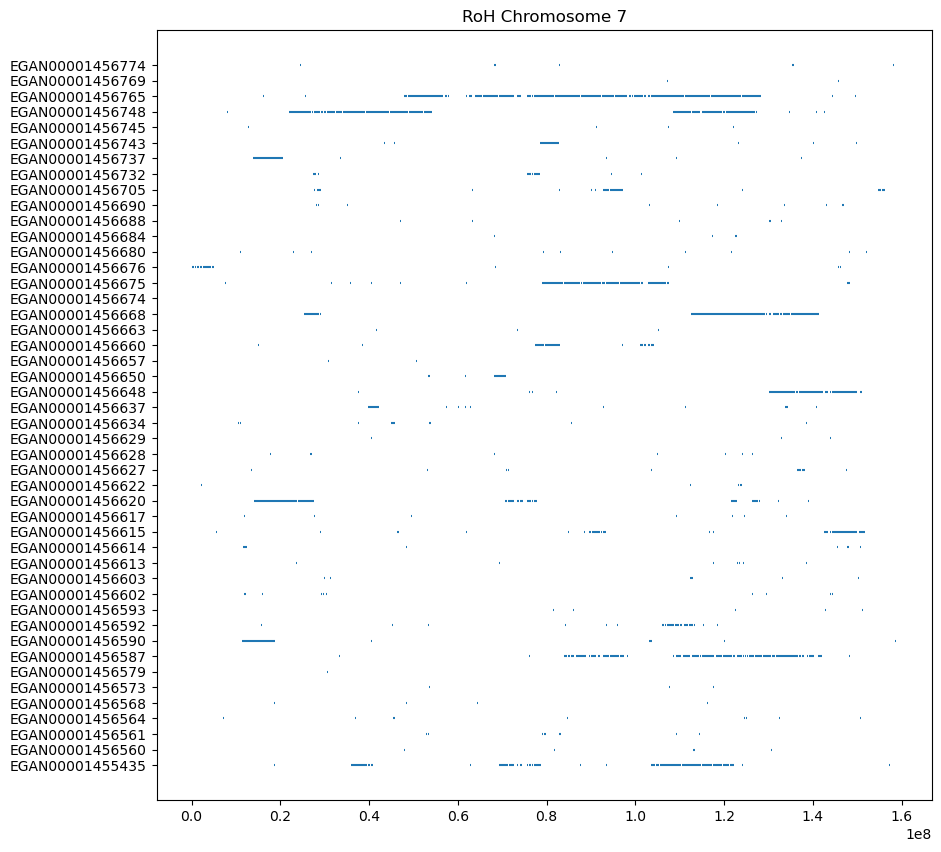

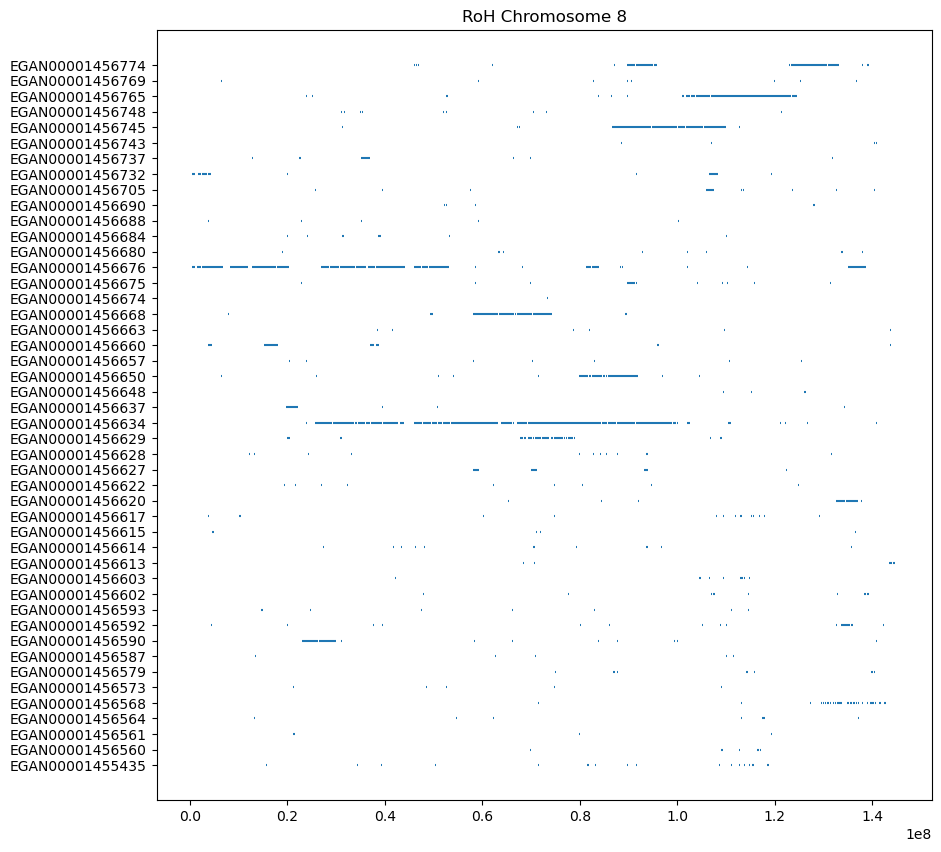

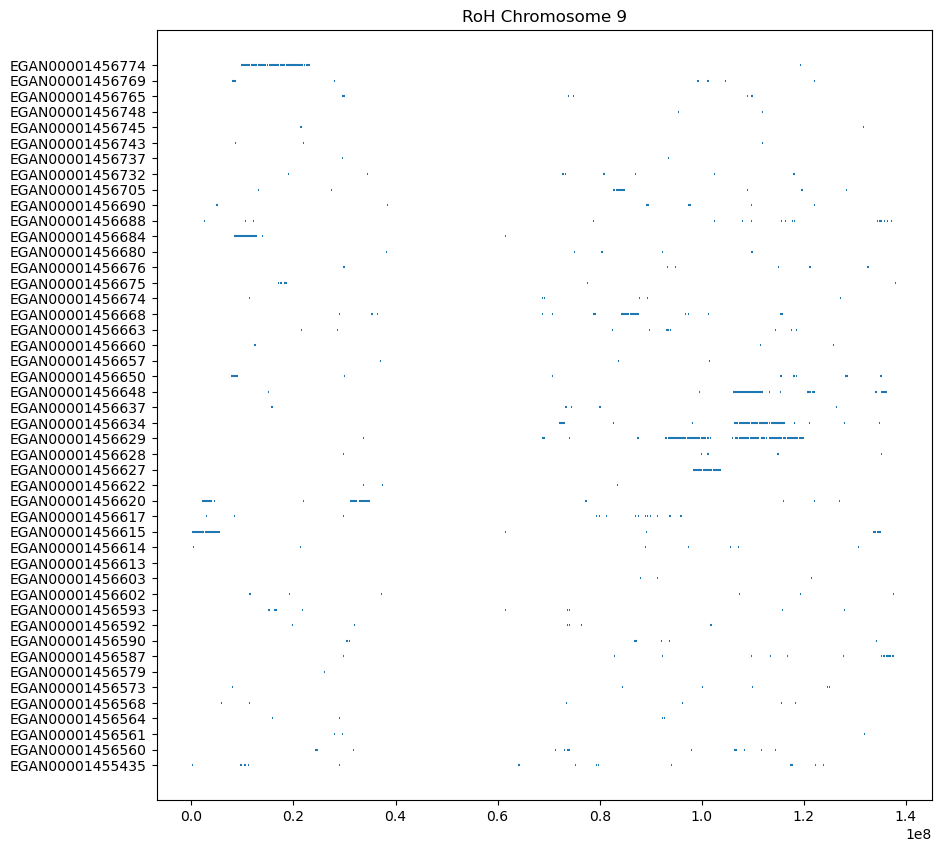

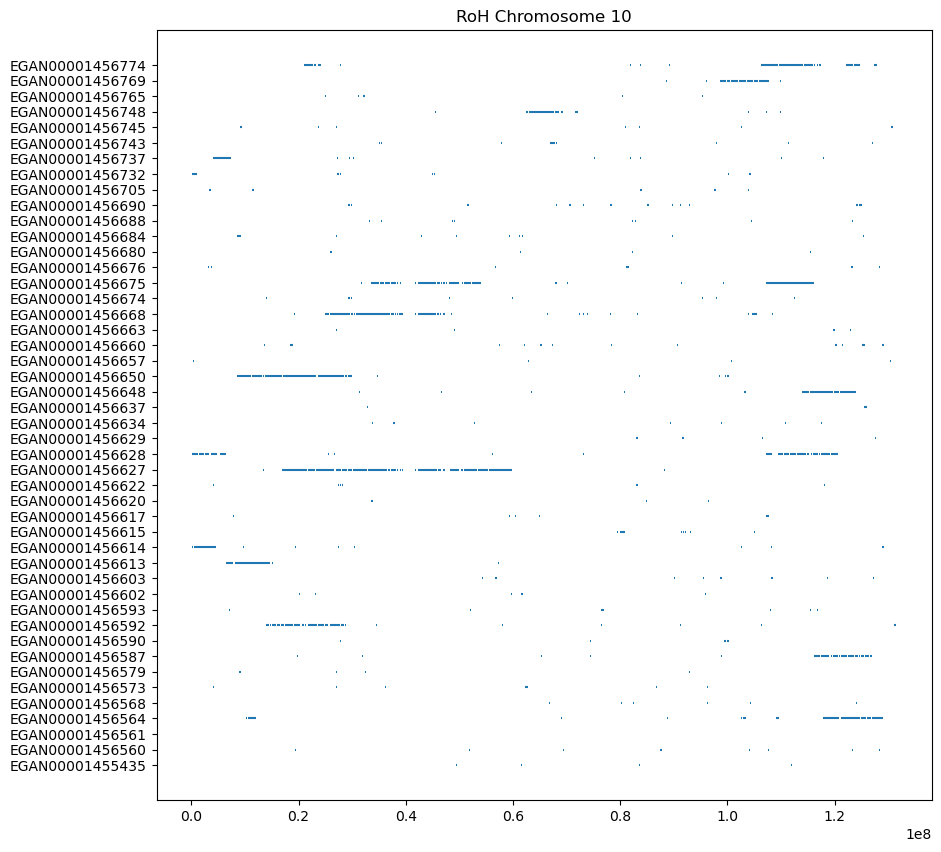

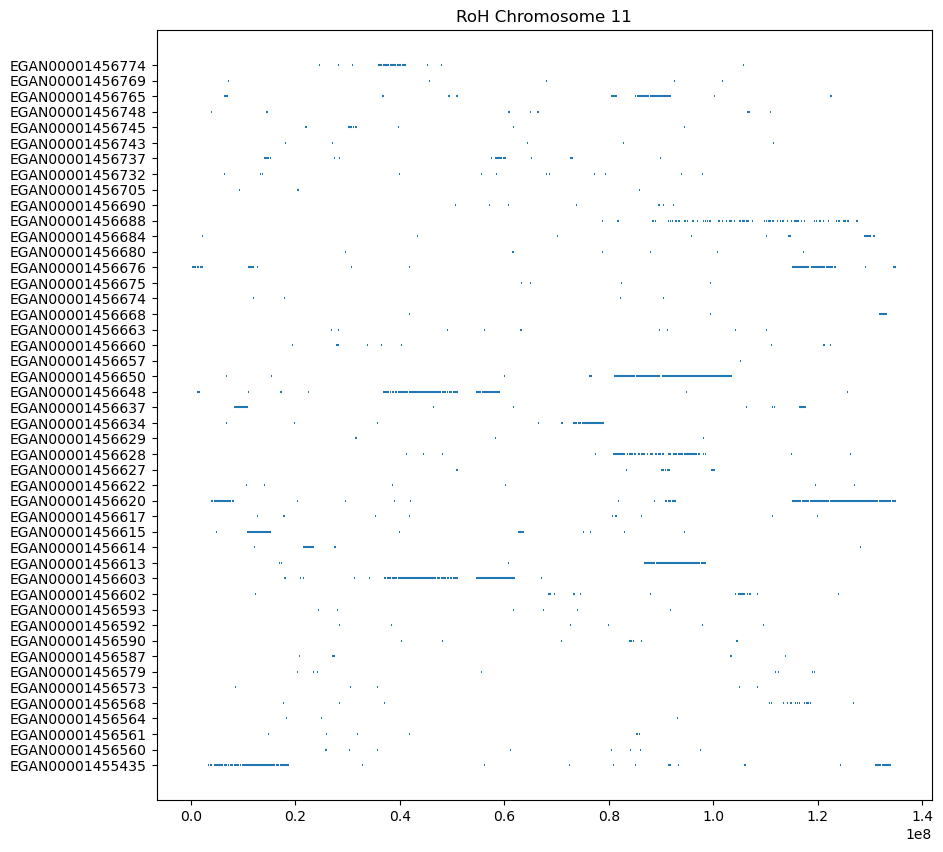

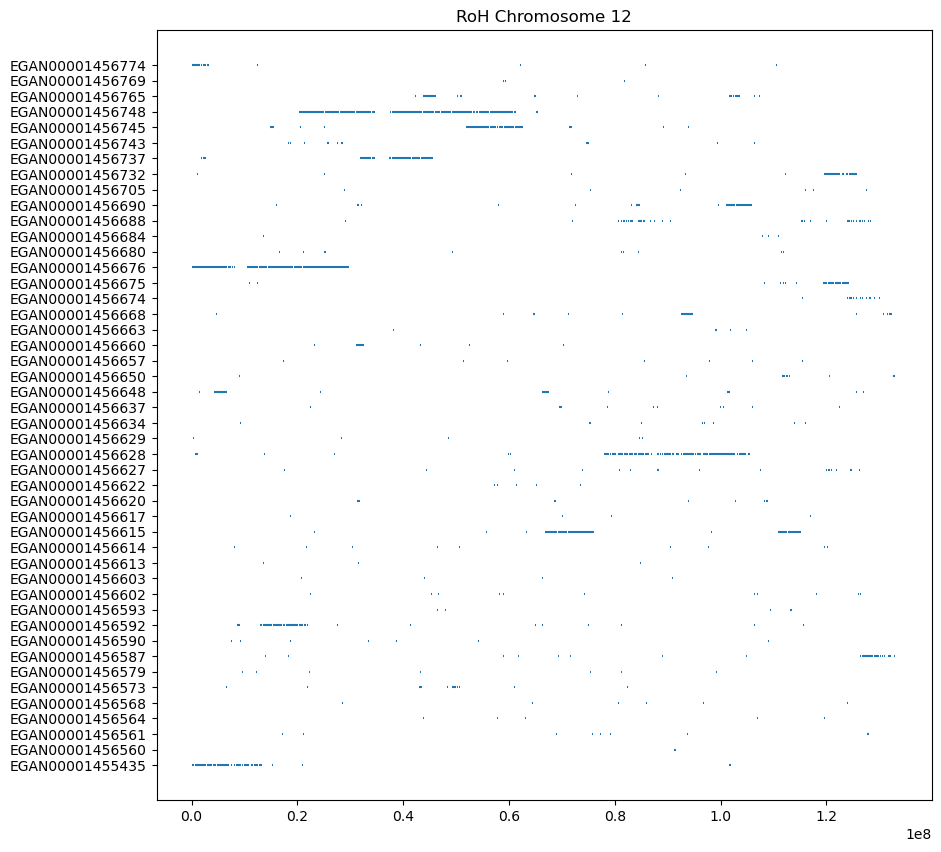

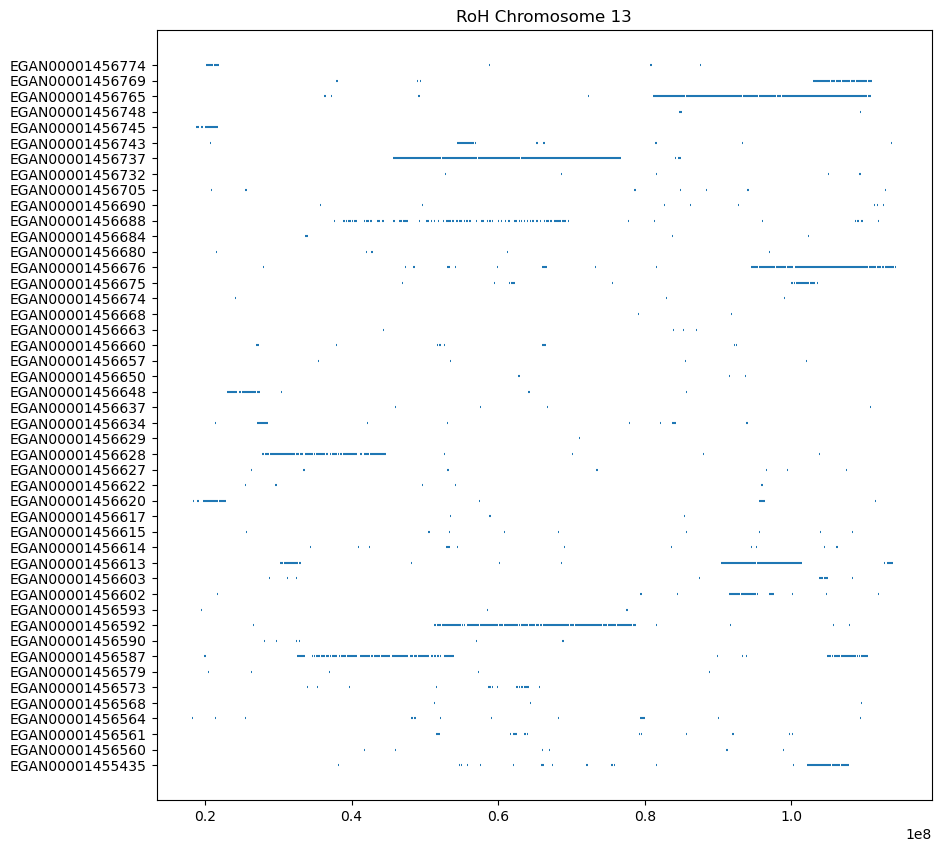

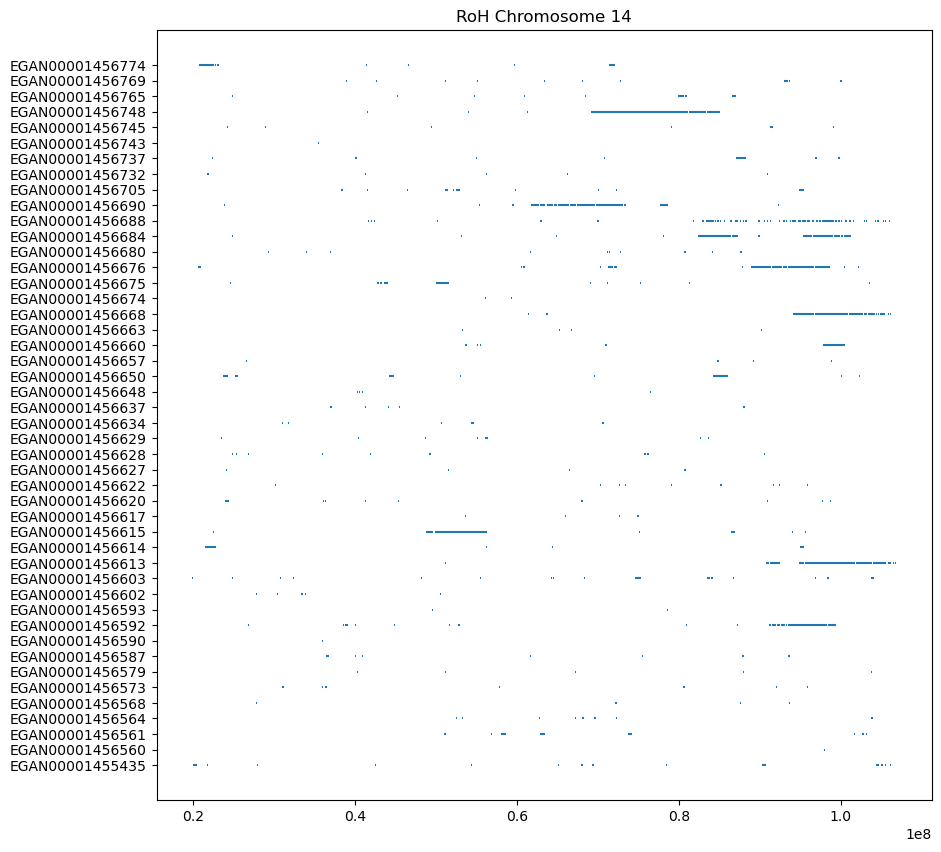

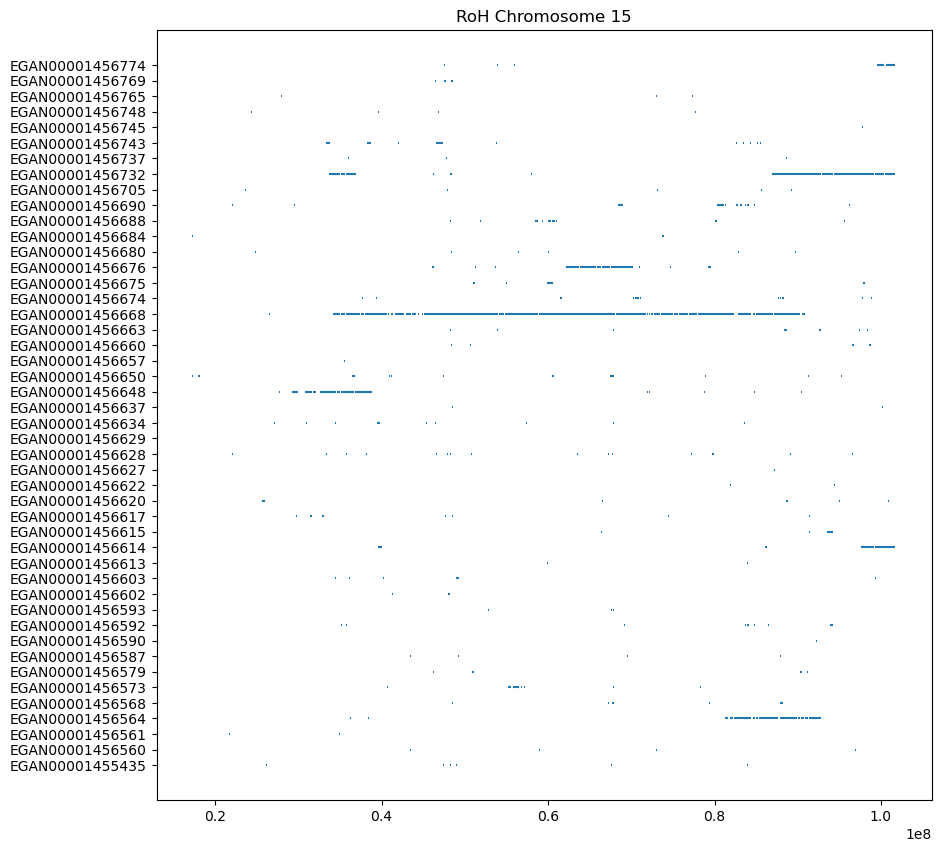

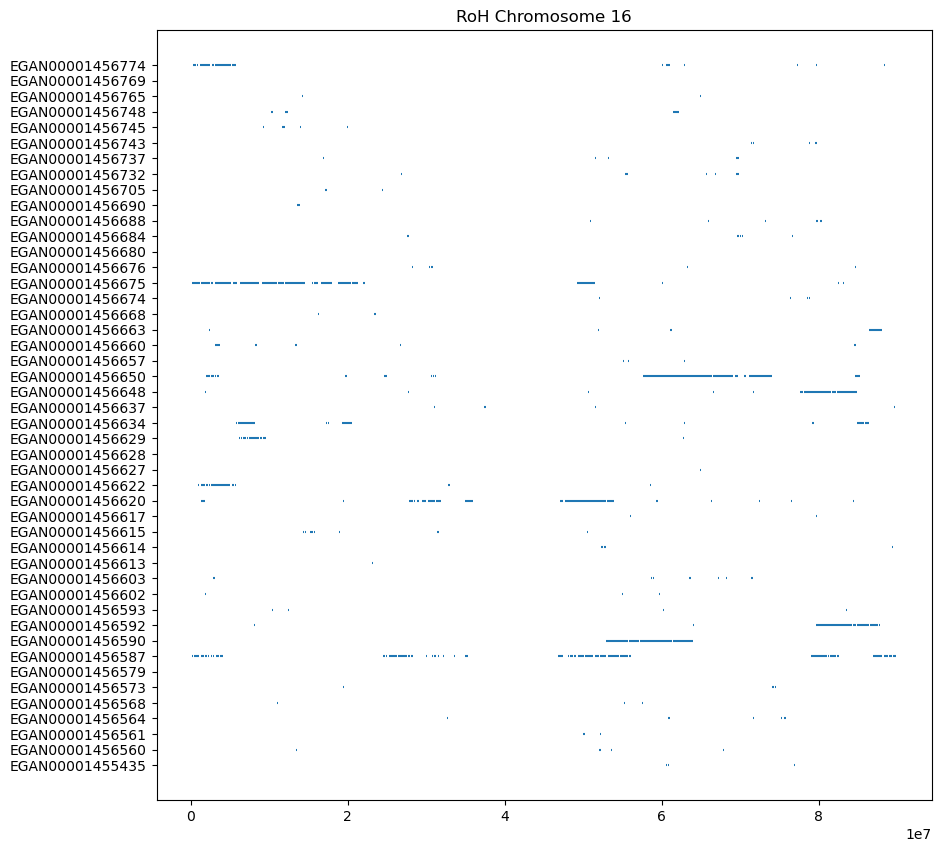

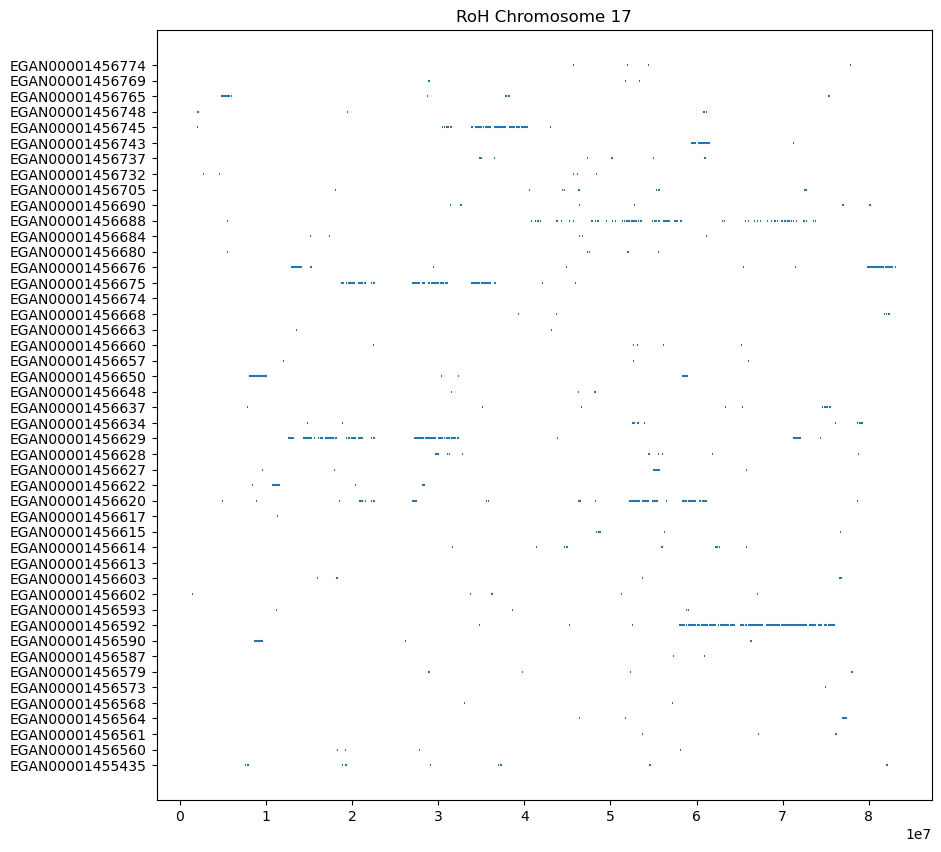

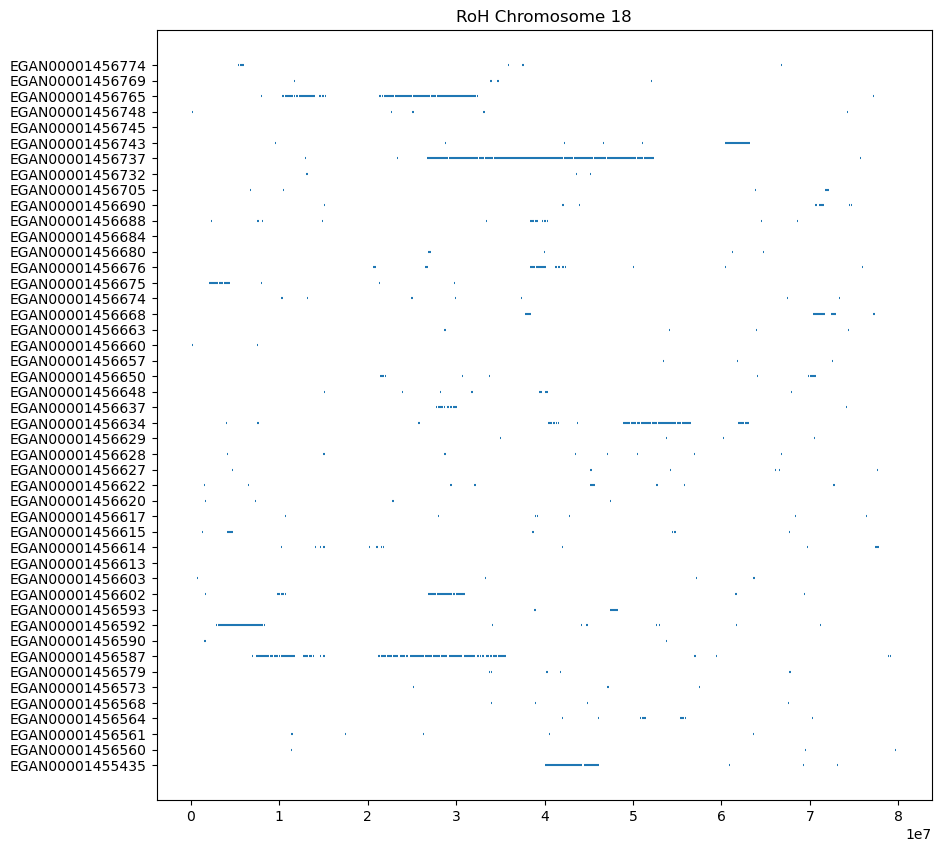

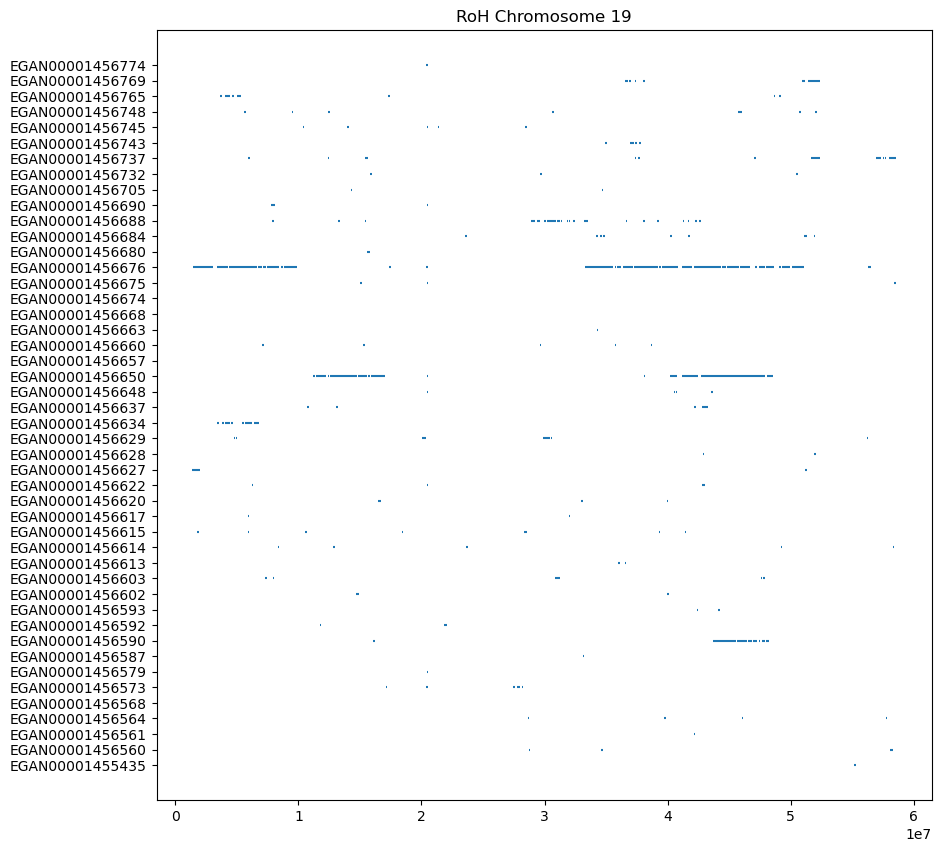

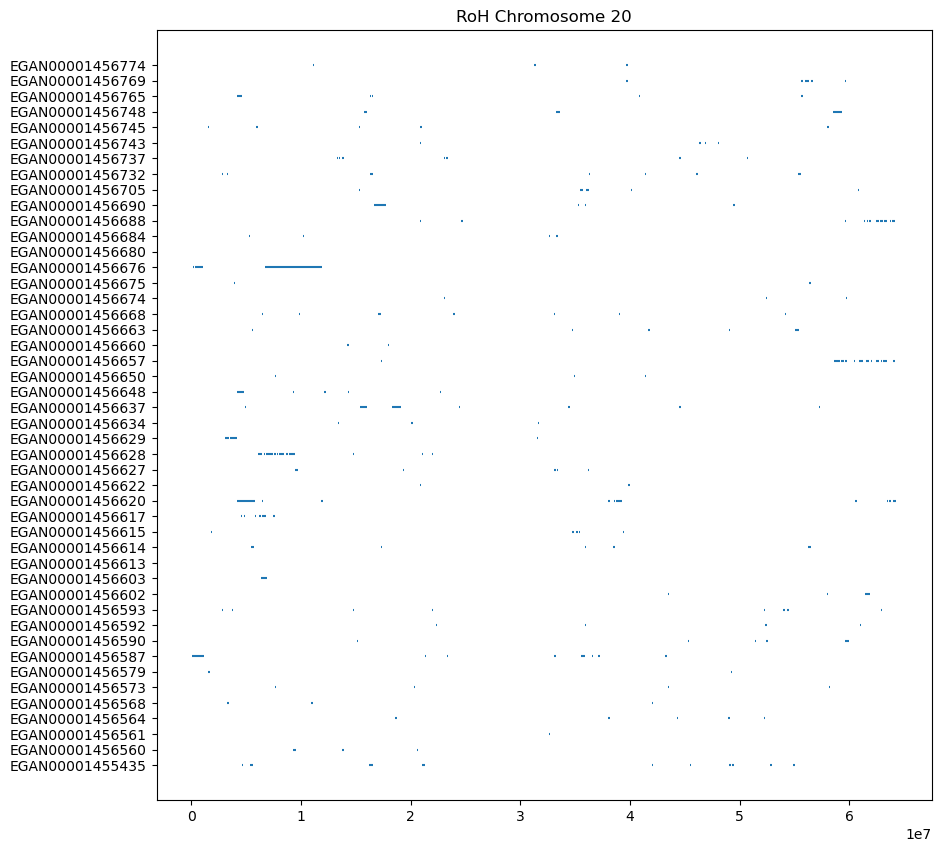

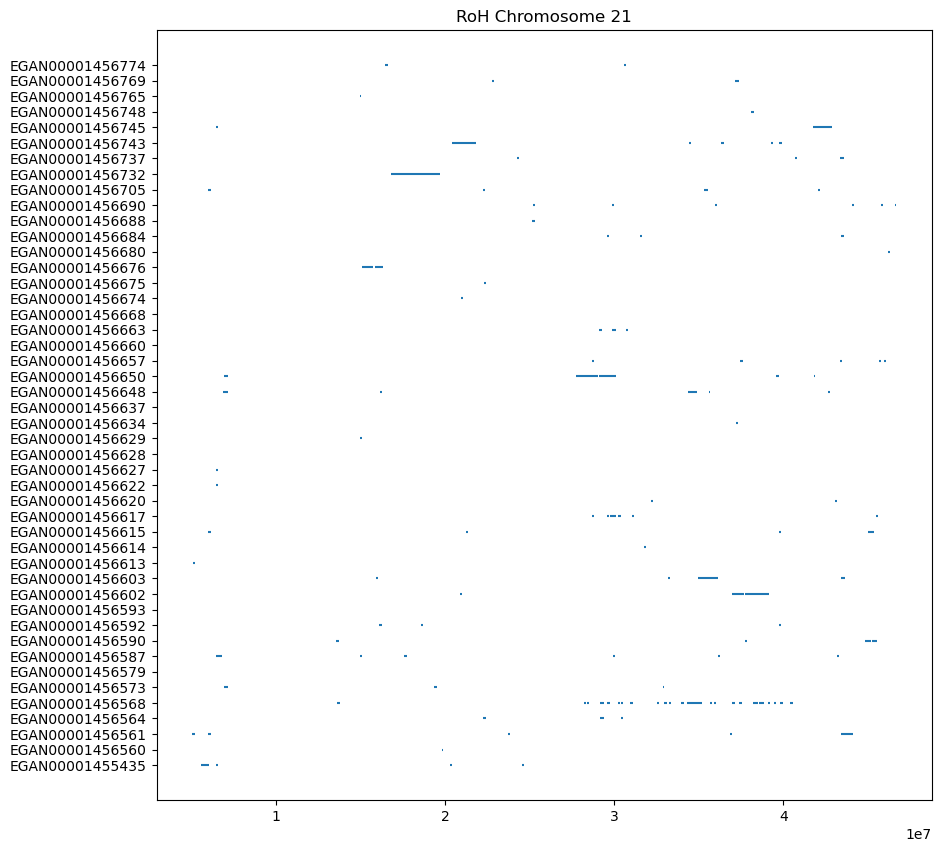

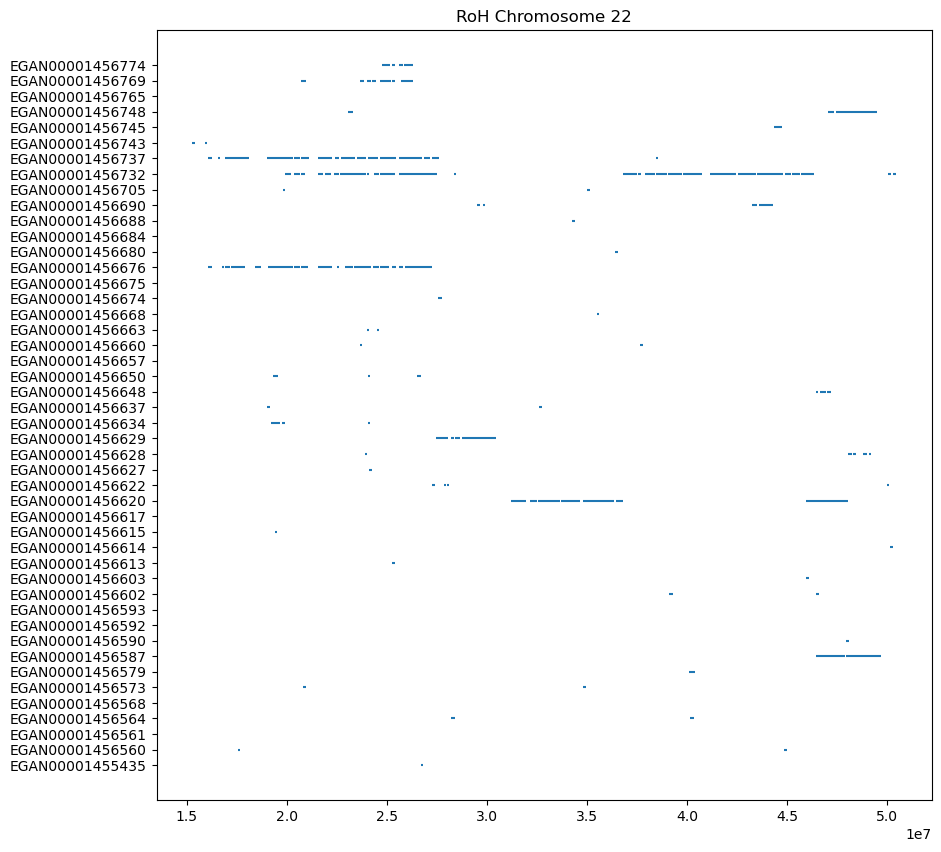

In [105]:
for i in range(1,23):
    df0 = df[(df.chrom==f'chr{i}')]
    fig, ax = plt.subplots(figsize=(10,10))
    fig.canvas.draw()
    ax.hlines(df0.y, df0['from'], df0['to'])
    ax.set_title(f'RoH Chromosome {i}')
    _=ax.set_yticks(ticks=list(sampleIds.values()), labels=list(sampleIds.keys()))

In [66]:
summary = df.groupby('id').sum('lengthBps')

In [53]:
df.head()

,Unnamed: 0,id,chrom,nSNP,from,to,lengthBps,gov,group,y
0,1,EGAN00001455435,chr1,3480,975029,1382614,407586.0,Dhamar,Azal,1
1,2,EGAN00001455435,chr1,1648,1751847,1981922,230076.0,Dhamar,Azal,1
2,3,EGAN00001455435,chr1,798,1994557,2106263,111707.0,Dhamar,Azal,1
3,4,EGAN00001455435,chr1,974,2107090,2262209,155120.0,Dhamar,Azal,1
4,5,EGAN00001455435,chr1,2453,2282527,2651798,369272.0,Dhamar,Azal,1


In [70]:
def lookupDistr(sid, col='group'): 
    return list(df[df.id==sid].head(1)[col])[0]
summary['district']=[lookupDistr(sid) for sid in summary.index]

In [72]:
summary.head()

,Unnamed: 0,nSNP,from,to,lengthBps,y,district
id,,,,,,,
EGAN00001455435,5546747,884106,53599530219,53753587051,154057455.0,623,Azal
EGAN00001456560,1714811,166710,18032883701,18061075529,28192025.0,394,Aljanad
EGAN00001456561,1708703,132605,13015658884,13039593468,23934747.0,489,Hudayda
EGAN00001456564,2924531,319632,21779585672,21833388577,53803177.0,1088,Azal
EGAN00001456568,2659700,206261,23725340242,23761268080,35928094.0,1280,Aljanad


In [74]:
summary.groupby('district').agg({'lengthBps': ['mean', 'std']})

lengthBps              
                   mean           std
district                             
Aden       8.137943e+07  4.573480e+07
Aljanad    1.126725e+08  8.163801e+07
Azal       1.144128e+08  1.155905e+08
Hadramaut  1.280835e+08  7.488651e+07
Hudayda    1.286206e+08  9.444309e+07
Sheba      1.291051e+08  5.974520e+07
Tahamh     8.252626e+07  8.351019e+07

In [79]:
summary[summary.district=='Azal']

,Unnamed: 0,nSNP,from,to,lengthBps,y,district,Froh
id,,,,,,,,
EGAN00001455435,5546747,884106,53599530219,53753587051,154057455.0,623,Azal,0.047427
EGAN00001456564,2924531,319632,21779585672,21833388577,53803177.0,1088,Azal,0.016563
EGAN00001456579,1365745,157268,13819231722,13847792977,28561414.0,1113,Azal,0.008793
EGAN00001456593,1659881,148411,14991503399,15017388451,25885230.0,1958,Azal,0.007969
EGAN00001456615,3426512,612040,31369016145,31470195297,101179486.0,5344,Azal,0.031148
EGAN00001456648,5032349,878963,45564929785,45706958873,142029584.0,12400,Azal,0.043724
EGAN00001456660,2329266,312070,19783101011,19832312269,49211493.0,6580,Azal,0.015150
EGAN00001456663,1971910,209882,20432034582,20465324720,33290351.0,6177,Azal,0.010248
EGAN00001456668,7483908,1602103,67227290283,67503914010,276624508.0,23430,Azal,0.085159


In [78]:
genomeLength = 3248321194
summary['Froh'] = summary.lengthBps/genomeLength

In [91]:
meanstd = ['mean', 'std']
wgsFroh = summary.groupby('district').agg({'Froh': meanstd})
wgsFroh.columns = meanstd
wgsFroh

,mean,std
district,,
Aden,0.025053,0.014080
Aljanad,0.034686,0.025132
Azal,0.035222,0.035585
Hadramaut,0.039431,0.023054
Hudayda,0.039596,0.029074
Sheba,0.039745,0.018393
Tahamh,0.025406,0.025709


<BarContainer object of 7 artists>

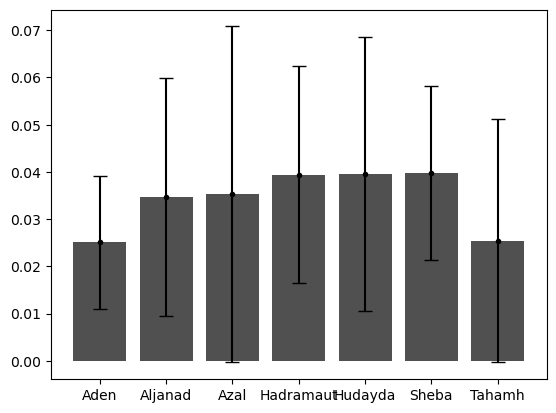

In [97]:
plt.errorbar(wgsFroh.index, wgsFroh['mean'], yerr=wgsFroh['std'], fmt='.', color='Black', capsize=5)
plt.bar(wgsFroh.index, wgsFroh['mean'], color='#505050')

#fig, ax = plt.subplots()


In [89]:
wgsFroh.plot(')